**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime as dt

**Reading Dataset**

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("submission.csv")

In [4]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


**Checking for possible missing values**

In [5]:
train.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

In [6]:
test.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
dtype: int64

### Feature Engineering

In [7]:
#Extracting 'Hour' data from timestamp
train['hour']=pd.to_datetime(train['timestamp']).dt.hour
test['hour']=pd.to_datetime(test['timestamp']).dt.hour

In [8]:
# Extracting 'Month' data from timestamp
train['month']=pd.to_datetime(train['timestamp']).dt.month
test['month']=pd.to_datetime(test['timestamp']).dt.month

In [9]:
#Finding out power loss by subtracting power calculated by converter from the raw power
train['active_power_loss']=train['active_power_raw']-train['active_power_calculated_by_converter']
train['reactive_power_loss']=train['reactive_power']-train['reactice_power_calculated_by_converter']

In [10]:
test['active_power_loss']=test['active_power_raw']-test['active_power_calculated_by_converter']
test['reactive_power_loss']=test['reactive_power']-test['reactice_power_calculated_by_converter']

In [11]:
#apparent power is a pythagoras sum of Active Power and Reactive Power
train['apparent_power']=np.sqrt(train['active_power_calculated_by_converter'].values**2
                                +train['reactice_power_calculated_by_converter'].values**2)

In [12]:
test['apparent_power']=np.sqrt(test['active_power_calculated_by_converter'].values**2
                               +test['reactice_power_calculated_by_converter'].values**2)

### Exploratory Data Anlaysis

In [13]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,hour,month,active_power_loss,reactive_power_loss,apparent_power
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,280.864782,7.057000,0.544082,Turbine_108,47.582787,20,2,18.280446,24.043874,828.797841
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,299.552460,5.474937,0.469031,Turbine_18,46.070328,4,4,1.943044,24.648778,428.492236
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,84.960106,8.092457,0.622318,Turbine_105,39.989236,6,1,34.035583,50.829943,1323.774364
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,87.261119,4.071032,0.760719,Turbine_15,46.056587,3,10,-8.013865,8.806516,90.363255
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,313.724818,6.357943,0.346068,Turbine_01,54.346095,0,3,18.144745,23.038483,609.157817


In [14]:
column_names=list(train.columns)
column_names.remove('turbine_id')
column_names.remove('timestamp')

In [15]:
column_names

['active_power_calculated_by_converter',
 'active_power_raw',
 'ambient_temperature',
 'generator_speed',
 'generator_winding_temp_max',
 'grid_power10min_average',
 'nc1_inside_temp',
 'nacelle_temp',
 'reactice_power_calculated_by_converter',
 'reactive_power',
 'wind_direction_raw',
 'wind_speed_raw',
 'wind_speed_turbulence',
 'Target',
 'hour',
 'month',
 'active_power_loss',
 'reactive_power_loss',
 'apparent_power']

### Univariate Analysis

C:\conda_temp\ipykernel_12264\2084224240.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

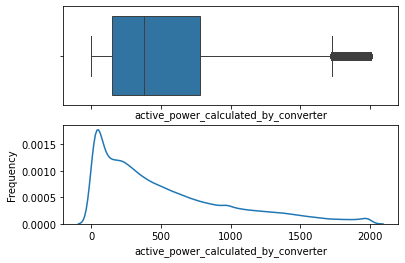

<Figure size 432x288 with 0 Axes>

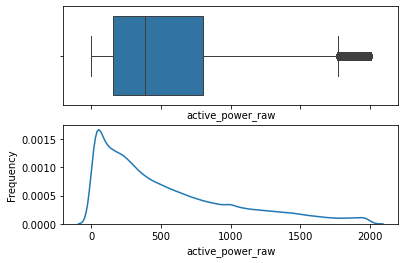

<Figure size 432x288 with 0 Axes>

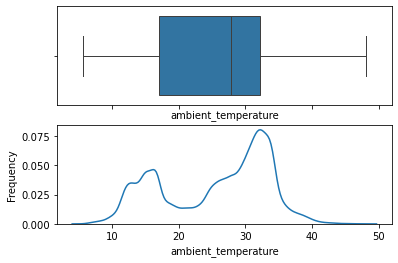

<Figure size 432x288 with 0 Axes>

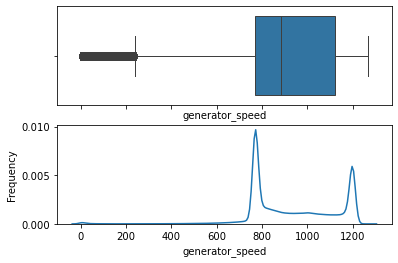

<Figure size 432x288 with 0 Axes>

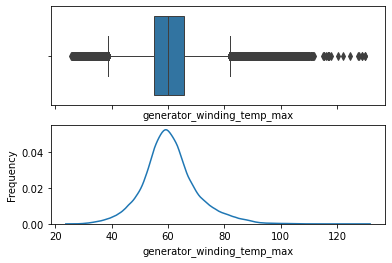

<Figure size 432x288 with 0 Axes>

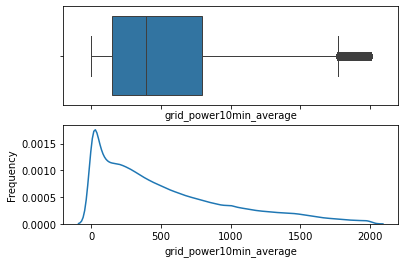

<Figure size 432x288 with 0 Axes>

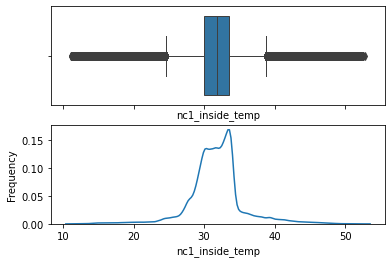

<Figure size 432x288 with 0 Axes>

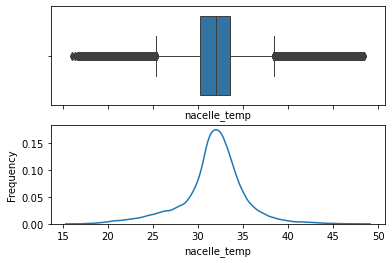

<Figure size 432x288 with 0 Axes>

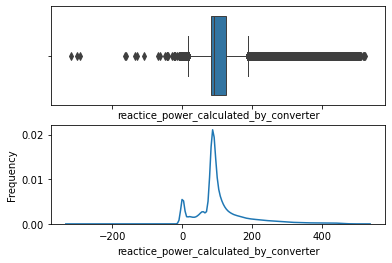

<Figure size 432x288 with 0 Axes>

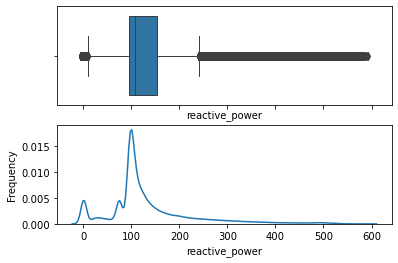

<Figure size 432x288 with 0 Axes>

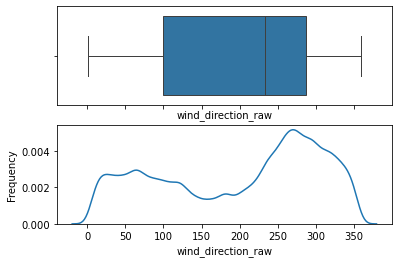

<Figure size 432x288 with 0 Axes>

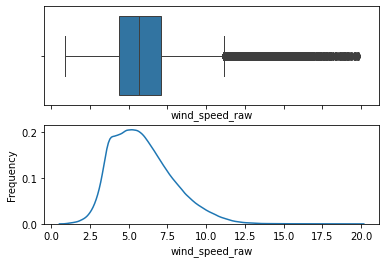

<Figure size 432x288 with 0 Axes>

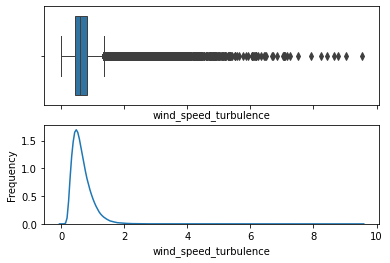

<Figure size 432x288 with 0 Axes>

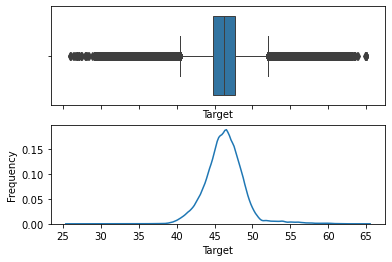

<Figure size 432x288 with 0 Axes>

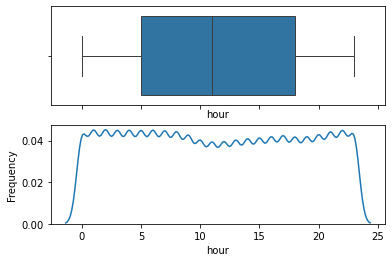

<Figure size 432x288 with 0 Axes>

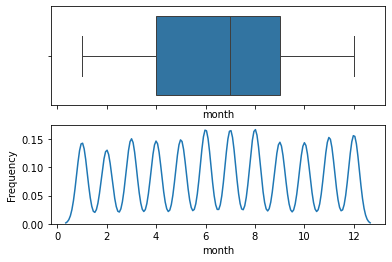

<Figure size 432x288 with 0 Axes>

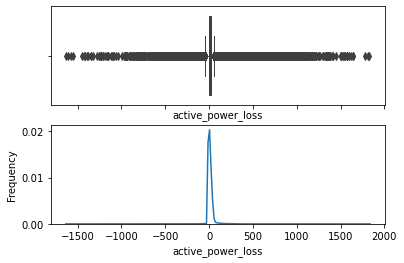

<Figure size 432x288 with 0 Axes>

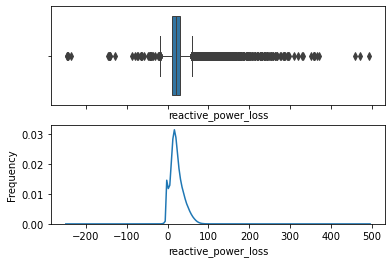

<Figure size 432x288 with 0 Axes>

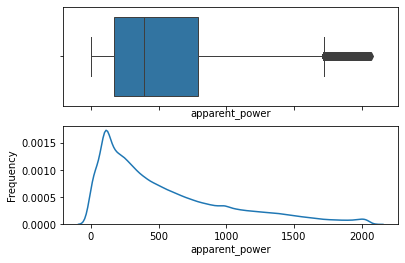

In [16]:
for i in column_names:
    plt.figure()
    plt.tight_layout()
    
    f, (ax_box, ax_kde) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=train[i], ax=ax_box , linewidth= 1.0)
    sns.kdeplot(x=train[i], ax=ax_kde)

**Observation**:- We can observe that most of the power related features are right-skewed. Outliers are present in most of the features.  

### Bivariate Analysis

In [17]:
#finding corelation among the variables
corr=train.corr()

<AxesSubplot:>

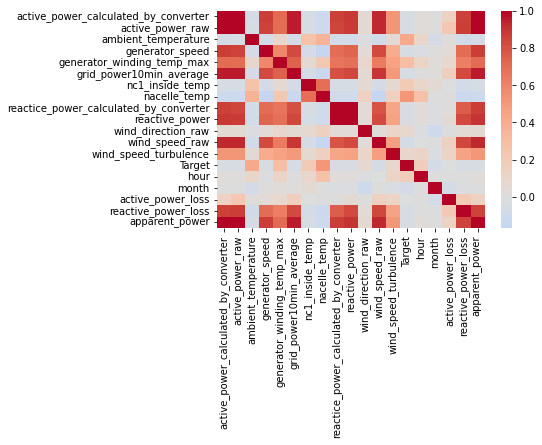

In [41]:
sns.heatmap(corr,cmap='coolwarm',center=0) #used coolwarm color palatte
#centre is at 0 to disinguish positive corelation and negative corelation

**Observation**:- We can observe that power related features are highly correlated to each other.Also, wind speed is correlated to other power features

<AxesSubplot:xlabel='Target', ylabel='turbine_id'>

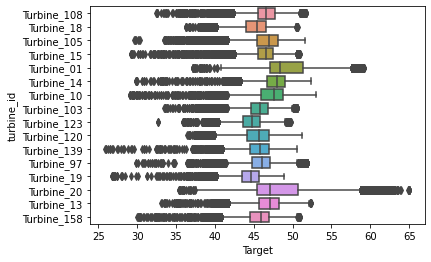

In [36]:
sns.boxplot(y=train['turbine_id'],x=train['Target'])

<AxesSubplot:xlabel='hour', ylabel='Target'>

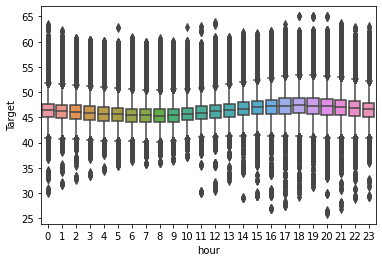

In [34]:
sns.boxplot(x=train['hour'],y=train['Target'])

<AxesSubplot:xlabel='month', ylabel='Target'>

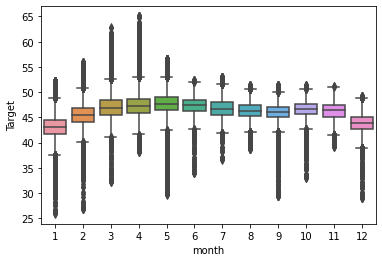

In [33]:
sns.boxplot(x=train['month'],y=train['Target'])

### Feature Selection

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


In [45]:
Target=train['Target']

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le=LabelEncoder()

In [48]:
le.fit(train['turbine_id'])
train['turbine_id']=le.transform(train['turbine_id'])
test['turbine_id']=le.transform(test['turbine_id'])

In [49]:
train.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,hour,month,active_power_loss,reactive_power_loss,apparent_power
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,280.864782,7.057000,0.544082,4,47.582787,20,2,18.280446,24.043874,828.797841
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,299.552460,5.474937,0.469031,12,46.070328,4,4,1.943044,24.648778,428.492236
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,84.960106,8.092457,0.622318,3,39.989236,6,1,34.035583,50.829943,1323.774364
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,87.261119,4.071032,0.760719,10,46.056587,3,10,-8.013865,8.806516,90.363255
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,313.724818,6.357943,0.346068,0,54.346095,0,3,18.144745,23.038483,609.157817


In [50]:
test.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,hour,month,active_power_loss,reactive_power_loss,apparent_power
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,9,15,5,4.449345,-0.950326,15.695102
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,13,6,12,5.796626,23.226164,482.259767
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,9,19,8,3.328649,26.941106,456.833342
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,5,19,9,-4.575371,15.812419,269.245429
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,11,2,4,27.723511,46.321332,1190.151278


In [51]:
train=train.drop(['timestamp','Target'],axis=1)
test=test.drop('timestamp',axis=1)

In [52]:
from sklearn.linear_model import LinearRegression as lr,RidgeCV as rcv,ElasticNet as en

In [53]:
from sklearn.model_selection import train_test_split

### Standard Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
ss=StandardScaler().fit(train)

In [56]:
train=pd.DataFrame(ss.transform(train),columns=train.columns)
test=pd.DataFrame(ss.transform(test),columns=test.columns)

### Forward Feature Selection

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
sfs1=sfs(k_features=8,forward=True,estimator=DecisionTreeRegressor(),verbose=1,
         scoring='neg_mean_absolute_percentage_error')

In [59]:
sfs1.fit(train,Target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 21.5min finished
Features: 1/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 13.6min finished
Features: 2/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 10.4min finished
Features: 3/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 10.9min finished
Features: 4/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 15.1min finished
Features: 5/8[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 19.4min finished
Features: 6/8[Parallel(n_jobs

SequentialFeatureSelector(estimator=DecisionTreeRegressor(), k_features=8,
                          scoring='neg_mean_absolute_percentage_error',
                          verbose=1)

**Following is the features list:**

In [60]:
sfs_feature_dt=list(sfs1.k_feature_names_)
sfs_feature_dt

['ambient_temperature',
 'generator_winding_temp_max',
 'grid_power10min_average',
 'nc1_inside_temp',
 'wind_direction_raw',
 'turbine_id',
 'hour',
 'month']

In [61]:
train1=train[sfs_feature_dt]
test1=test[sfs_feature_dt]

### Train Validation Split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(train1,Target,test_size=0.3,random_state=20)

In [ ]:
### Training model on various ml algorithms

In [63]:
lr1=lr().fit(X_train,y_train) #linearRegression

In [64]:
lr_val=lr1.predict(X_test)

In [65]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [66]:
mape(y_test,lr_val)

0.031361300887430964

In [67]:
rcv1=rcv().fit(X_train,y_train)# RidgeCV

In [68]:
rcv_val=rcv1.predict(X_test)

In [69]:
mape(y_test,rcv_val)

0.03136129325343164

In [70]:
en1=en().fit(X_train,y_train) #ElasticNet

In [71]:
en_val=en1.predict(X_test)

In [72]:
mape(y_test,en_val)

0.03785461843808553

In [92]:
dtr=DecisionTreeRegressor() #decisionTree

In [93]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [94]:
dtr_val=dtr.predict(X_test)

In [95]:
mape(y_test,dtr_val)

0.008250804023255173

In [78]:
from sklearn.ensemble import RandomForestRegressor 

In [79]:
rf=RandomForestRegressor()# RandomForest

In [80]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
rf_val=rf.predict(X_test)

In [82]:
mape(y_test,rf_val)

0.007288942018512916

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

In [84]:
etr=ExtraTreesRegressor()

In [ ]:
etr.fit(X_train,y_train)#Extratreeregressor

### Feature Importance

In [86]:
featuresimp_value=etr.feature_importances_

In [87]:
featuresimp_value

array([0.19798046, 0.06091976, 0.04009326, 0.05659086, 0.05927591,
       0.23360787, 0.07355027, 0.27798162])

<AxesSubplot:>

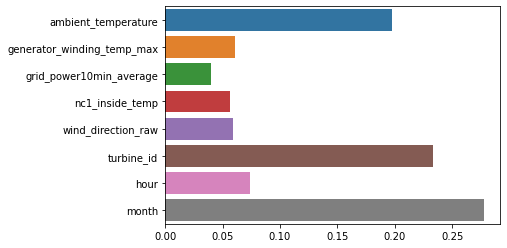

In [88]:
sns.barplot(y=train1.columns,x=featuresimp_value)

In [89]:
etr_val=etr.predict(X_test)

In [90]:
mape(y_test,etr_val)

0.00551289450037929

### final predictions

In [90]:
test_pred=etr.predict(test1)

In [91]:
submission.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [92]:
submission['Target']=test_pred

In [93]:
submission.to_csv("rph3_1_xtratree.csv",index=False)